##  Intialization

In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Basic Questions 

1. Who were the passengers on the Titanic
2. What deck were the on and how that relates to their class
3. Where did the passengers come from
4. Who was alone and who came with family
5. What factors helped someone survive the sinking

## Analysis

#### importing a few more libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### visualization

male and female count

Text(0.5,0,'Sex')

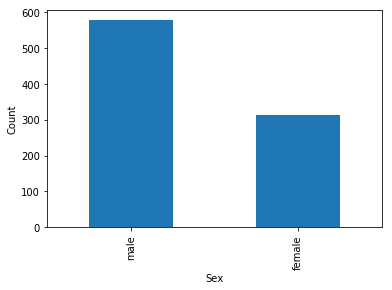

In [5]:
Sex_count=titanic_df.Sex.value_counts()
Sex_count.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Sex")

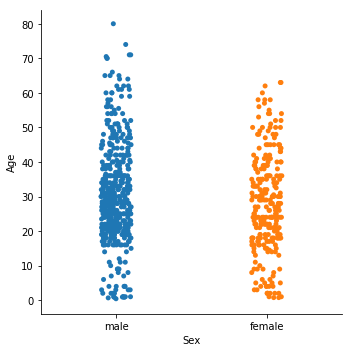

In [6]:
sns.catplot(x="Sex",y="Age",data=titanic_df)

In [7]:
#create a function to use the apply technique

def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [8]:
#introducing a new column: person

titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


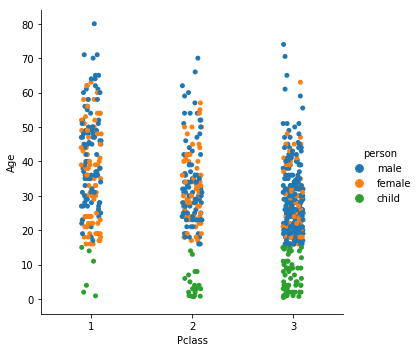

In [9]:
sns.catplot(x="Pclass",y="Age",hue="person",data=titanic_df)

 we find a lot of children and men in 3rd class and approximately equal amount of male and female in 1st class

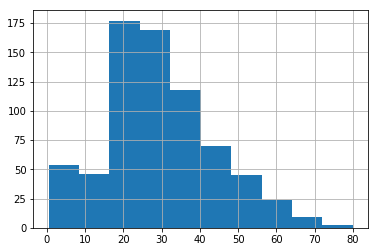

In [55]:
titanic_df['Age'].hist(bins=10)

In [11]:
titanic_df['Age'].mean()

29.69911764705882

In [12]:
cnt=titanic_df['person'].value_counts()
cnt

male      537
female    271
child      83
Name: person, dtype: int64

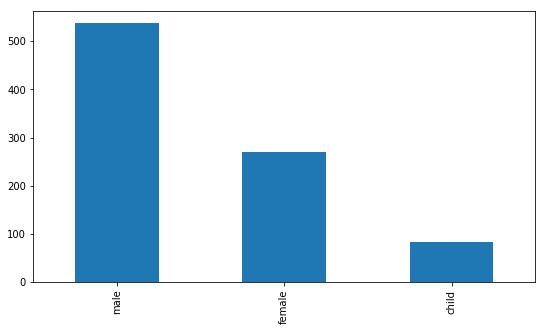

In [13]:
cnt.plot(kind='bar',figsize=(9,5))

In [33]:
x = list(titanic_df.person.unique())

In [46]:
y =list(titanic_df.person.value_counts())

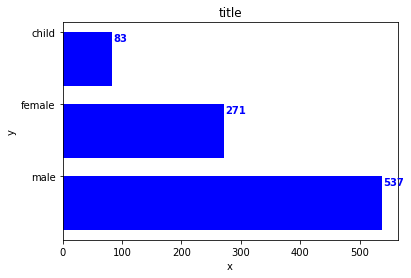

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
#x = [u'INFO', u'CUISINE', u'TYPE_OF_PLACE', u'DRINK', u'PLACE', u'MEAL_TIME', u'DISH', u'NEIGHBOURHOOD']
#y = [160, 167, 137, 18, 120, 36, 155, 130]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')


for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')


#plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [15]:
deck=titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

#### Where did the passengers come from

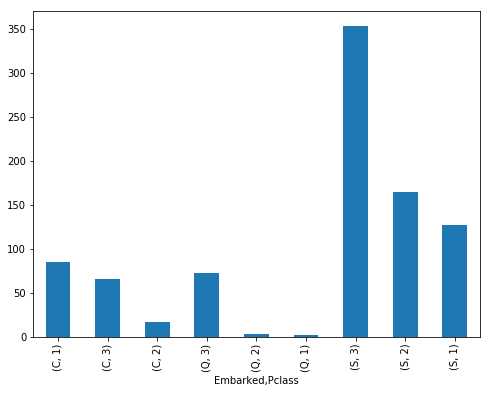

In [16]:
titanic_df.groupby('Embarked')['Pclass'].value_counts().plot(kind='bar',figsize=(8,6))

In [17]:
titanic_df.groupby('Embarked')['Pclass'].value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

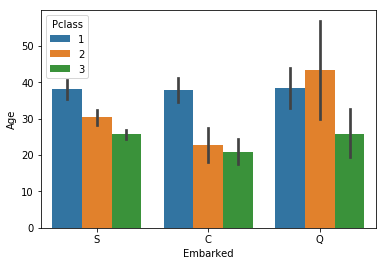

In [18]:
sns.barplot(x="Embarked",y="Age",data=titanic_df,hue="Pclass")

this plot is not giving us much of an idea about anything

#### who was alone and who was with family

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
titanic_df['Alone']=titanic_df['SibSp']+titanic_df['Parch']

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [22]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]="With Family"
titanic_df['Alone'].loc[titanic_df['Alone']==0]="Alone"

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


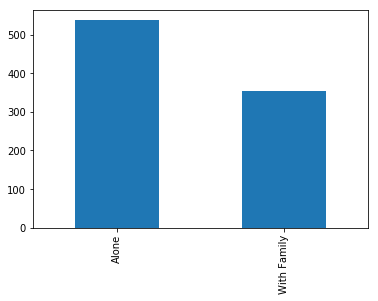

In [24]:
titanic_df.Alone.value_counts().plot(kind='bar')

#### survivors count

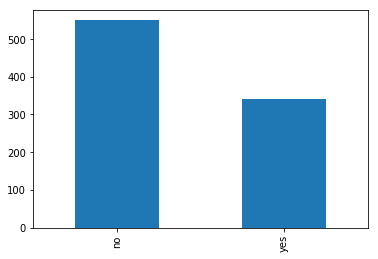

In [25]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})
xx=titanic_df.Survivor.value_counts()
xx.plot(kind='bar')

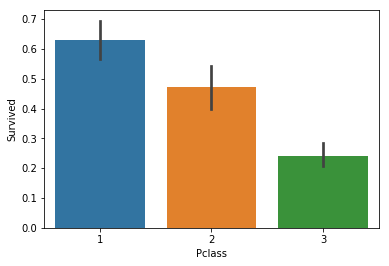

In [26]:
sns.barplot(x="Pclass",y="Survived",data=titanic_df)

- Third class looks significantly low
- It can be inferred from previous plots, 3rd class had maximum males
- So male had a higher chances of survival

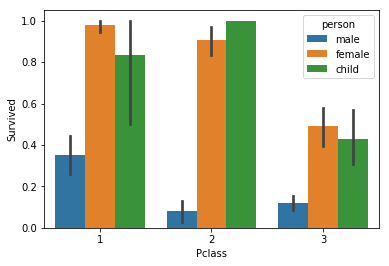

In [27]:
sns.barplot(x="Pclass",y="Survived",data=titanic_df,hue="person")

- This gives us a better picture of the population density on board

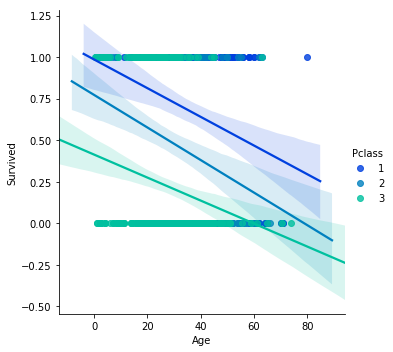

In [28]:
sns.lmplot("Age","Survived",hue='Pclass',data=titanic_df,palette='winter')

   - 0.00 refers to the people who didnot survive and their age
   - 1.00 refers to the people who survived and their corresponding ages
   - it is inferred that class 3 passengers had the least survival
   - the general trend in the middle of lmplot tells that the older the people the lesser the chance of their survival

### future analysis

- Did having a family member increase or decrease the survival chances?
